<a href="https://colab.research.google.com/github/lzhu19/muspop-analysis/blob/main/Music_Popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Domain: Music
*   Research Question: What factors make music popular?
*   Underlying Problem: if not "trendy" then old music will be lost just because they aren't as "good" as modern songs
*   Practical Significance: define "popular," predict whether new songs will be popular or not

For classical music, the band that is playing it can largely affect the resulting music
Depends on opinion on popularity; subjective

Make columns for artists, like composer, conductor, pianist, orchestra, something so that they are organized
If 3, then no pianist
artists


Kaggle: https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset/input

Music Rec for Spotify: https://www.section.io/engineering-education/building-spotify-recommendation-engine/

In [ ]:
import pandas as pd

In [ ]:
def load_into_dataframe(link, filename):
  """
  link: string for shareable link of data file on Google Drive.
  filename: string for name of data file.

  Returns DataFrame for loaded data file.
  """
  id = link.split("/")[-2:-1][0]
  downloaded = drive.CreateFile({'id':id})
  downloaded.GetContentFile(filename)
  df = pd.read_csv(filename, encoding='latin-1')

  return df

In [ ]:
# Code for reading data file on Google Drive into Colaboratory #

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Load csv file into CoLab and read it as a dataframe.
data_link = 'https://drive.google.com/file/d/16C_aoXSmA4-dDGgpmZQ4mC2EcN_Y0eqv/view?usp=drive_link' # Right-click on the data file (stored in YOUR PERSONAL Google Drive) and copy link
df = load_into_dataframe(data_link, 'data.csv')

In [ ]:
df.info()
# print(len(df))
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
170652,0.642,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,189507,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


In [ ]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
df['year'] = df['year'].astype(int)
print (df.dtypes)

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object


In [ ]:
# artists_length = list(df['artists'].str.len())
# x = list(df['artists'])
# artists_length = [len(i) for i in x]

x = list(df['artists'])
artists_number = [len(i.split(",")) for i in x]
df["artists_number"] = artists_number

type(artists_number)

# artists_number

list

In [ ]:
max_value = max(artists_number)
max_index = artists_number.index(max_value)

print(max_value)
print(max_index)

40
15969


In [ ]:
df.iloc[[max_index]]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists_number
15969,0.285,2001,0.641,"['Ricky Martin', 'Alejandro Sanz', 'Thalia', '...",0.276,237467,0.572,0,0tzixmHNQfE6S6SirSToxW,0.0,1,0.2,-7.818,1,El Ultimo AdiÃ³s - Varios Artistas Version,68,2001-11-21,0.0377,77.986,40


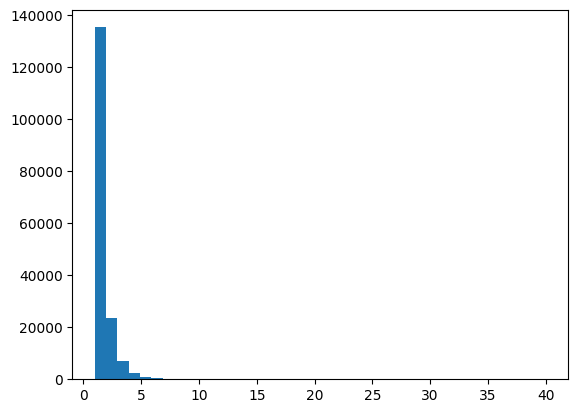

In [ ]:
from matplotlib import pyplot as plt

plt.hist(artists_number, 40)

plt.show()

In [ ]:
# artists_number

# selecting rows based on condition
rslt_df = df[df["artists_number"] == 1]

# print('\nResult dataframe :\n', rslt_df)

df = df.reset_index(drop=True)

In [ ]:
rslt_df['artists'][1]

"['Dennis Day']"

In [ ]:
# convert strings to lists in artists column (make sure its just the names [dennis day])

artist_names = rslt_df['artists'].tolist()

In [ ]:
# convert names to numbers (mepping/label encoding strings to numbers)

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column.
rslt_df['artists_names'] = label_encoder.fit_transform(artist_names)

rslt_df['artists_names'].unique()

array([ 3931,  7890,  5302, ...,  3171,  8407, 10762])

In [ ]:
# feed into model

In [ ]:
# creating feature variables
x = rslt_df.drop(['popularity', 'name', 'artists', 'id', 'release_date', 'artists_number'], axis= 1)

# come back to the artists column later

y = rslt_df['popularity']
print(x)
# print(y)

        valence  year  acousticness  danceability  duration_ms   energy  \
1        0.9630  1921       0.73200         0.819       180533  0.34100   
2        0.0394  1921       0.96100         0.328       500062  0.16600   
3        0.1650  1921       0.96700         0.275       210000  0.30900   
4        0.2530  1921       0.95700         0.418       166693  0.19300   
5        0.1960  1921       0.57900         0.697       395076  0.34600   
...         ...   ...           ...           ...          ...      ...   
170646   0.5220  2020       0.20400         0.598       230600  0.47200   
170647   0.0838  2020       0.97400         0.175       133500  0.00759   
170649   0.7340  2020       0.20600         0.717       150654  0.75300   
170650   0.6370  2020       0.10100         0.634       211280  0.85800   
170651   0.1950  2020       0.00998         0.671       337147  0.62300   

        explicit  instrumentalness  key  liveness  loudness  mode  \
1              0          0.00

In [ ]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
	x, y, test_size=0.3, random_state=101)


In [ ]:
# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train,y_train)


LinearRegression()

In [ ]:
# making predictions
predictions = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.719035418605307

<Axes: xlabel='popularity'>

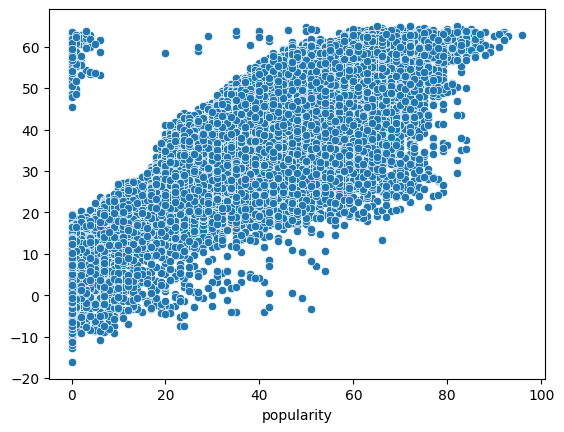

In [ ]:
sns.scatterplot(x= y_test, y= predictions)

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

y_test = y_test.to_numpy()
MAPE(y_test, predictions)

<ipython-input-27-714b5934545e>:2: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100


inf

In [ ]:
def calculate_smape(actual, predicted) -> float:

    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)

    return round(
        np.mean(
            np.abs(predicted - actual) / ((np.abs(predicted) + np.abs(actual))/2) )*100, 2
    )

print(calculate_smape(y_test, predictions), "%")

49.36 %


In [ ]:
calculate_smape(y_test, predictions)

49.36

In [ ]:
# decision tree/random forest for more complex data
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor()
regr_1.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predict
y_1 = regr_1.predict(X_test)

In [ ]:
print(len(y_1))
print(type(y_1))

print(len(predictions))
print(type(predictions))

40630
<class 'numpy.ndarray'>
40630
<class 'numpy.ndarray'>


In [ ]:
calculate_smape(y_test[:-1], y_1[:-1])

<ipython-input-28-43fc47401f5a>:11: RuntimeWarning: invalid value encountered in divide
  np.abs(predicted - actual) / ((np.abs(predicted) + np.abs(actual))/2) )*100, 2


nan

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# MSE = mean_squared_error(y_train, y_1)
# RMSE = math.sqrt(MSE)

In [ ]:
# y_test = y_test.to_numpy()

print(y_test.shape)
print(y_1.shape)

len(y_test)

(40630,)
(40630,)


40630

In [ ]:
y_test_copy = y_test[:]
y_1_copy = y_1[:]

In [ ]:
y_1

array([37., 44., 43., ..., 58., 53., 24.])

In [ ]:
y_test_copy

array([40, 41, 67, ..., 31, 66, 11])

In [ ]:
for i in range(0, 40630):
  if (y_test_copy[i] == 0) and (y_1_copy[i] == 0):
    y_test_copy[i] = 1
    y_1_copy[i] = 1

In [ ]:
calculate_smape(y_test_copy, y_1_copy)

36.2

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regr_2 = RandomForestRegressor(n_estimators=100,
								random_state=0)

# fit the regressor with x and y data
regr_2.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [ ]:
y_2 = regr_2.predict(X_test)
y_2_copy = y_2[:]

In [ ]:
for i in range(0, 40630):
  if (y_2_copy[i] == 0):
    y_2_copy[i] = 1

In [ ]:
calculate_smape(y_test_copy, y_2_copy)

35.18

In [ ]:
#calculate R-squared of regression model
r_squared = model.score(X_test, y_1)

#view R-squared value
print(r_squared)

0.6936010785062828


In [ ]:
#calculate R-squared of regression model
r_squared2 = model.score(X_test, y_2)

#view R-squared value
print(r_squared2)

0.9086291422095528


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, predictions)

0.7141298358558682

In [ ]:
r2_score(y_test, y_1)

0.5434019392549518

In [ ]:
r2_score(y_test, y_2)

0.7720922273785038

<Axes: >

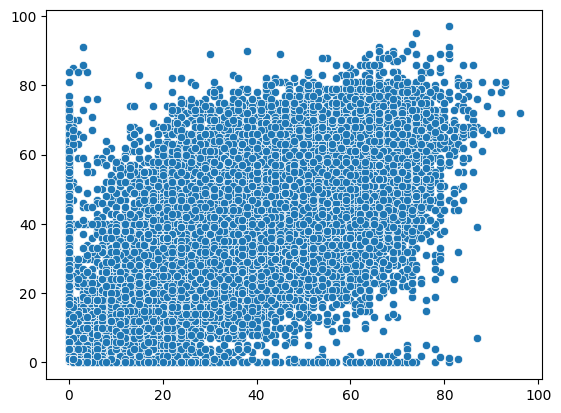

In [ ]:
sns.scatterplot(x= y_test, y= y_1)

<Axes: >

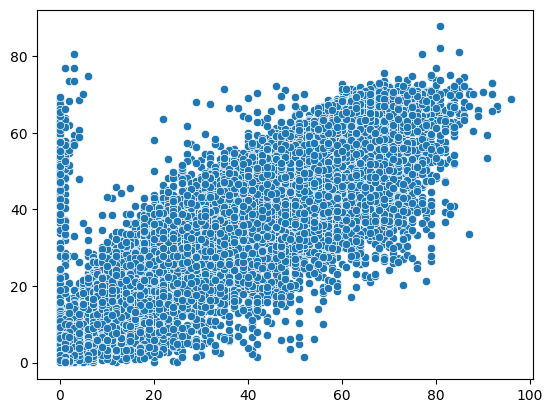

In [ ]:
sns.scatterplot(x= y_test, y= y_2)

Feature: 0, Score: 0.01839
Feature: 1, Score: 0.75569
Feature: 2, Score: 0.02055
Feature: 3, Score: 0.02141
Feature: 4, Score: 0.02639
Feature: 5, Score: 0.01880
Feature: 6, Score: 0.00084
Feature: 7, Score: 0.01818
Feature: 8, Score: 0.00961
Feature: 9, Score: 0.02016
Feature: 10, Score: 0.02118
Feature: 11, Score: 0.00190
Feature: 12, Score: 0.02141
Feature: 13, Score: 0.02001
Feature: 14, Score: 0.02550


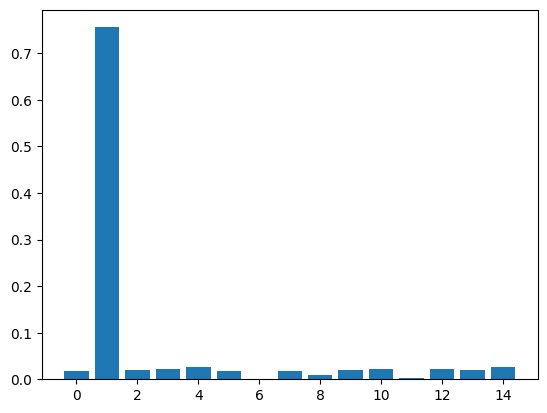

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# get importance
importance = regr_2.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [ ]:
# feats = {} # a dict to hold feature_name: feature_importance
# for feature, importance in zip(data.columns, model.feature_importances_):
#     feats[feature] = importance #add the name/value pair

# importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
# importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
X_train

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,artists_names
152741,0.7470,2005,0.2950,0.570,188267,0.806,0,0.000221,11,0.112,-9.849,1,0.0536,128.873,4169
164213,0.6890,1988,0.0194,0.620,299000,0.681,0,0.313000,10,0.304,-12.577,0,0.0326,104.208,2572
102499,0.6860,1989,0.9750,0.419,111600,0.154,0,0.851000,7,0.163,-18.150,1,0.0515,76.549,16627
146313,0.5460,1973,0.5950,0.558,180453,0.530,0,0.000061,2,0.110,-9.550,1,0.0399,128.750,5902
23075,0.0349,1941,0.0623,0.234,56332,0.997,0,0.611000,11,0.166,-4.262,1,0.4480,101.133,8995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77849,0.8350,1947,0.9950,0.483,201840,0.053,0,0.943000,9,0.102,-29.684,0,0.0425,101.911,15677
45605,0.7150,1962,0.4760,0.576,133467,0.328,0,0.000000,8,0.079,-10.269,0,0.0359,136.699,5307
111854,0.1430,1955,0.7660,0.262,215627,0.181,0,0.757000,0,0.102,-12.014,0,0.0333,127.844,4020
69954,0.7430,1994,0.1060,0.759,369120,0.951,0,0.000010,5,0.954,-4.659,0,0.0811,110.881,8349


In [ ]:
pip install mrmr_selection


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.8 MB/s eta 0:00:00


In [ ]:
import mrmr

In [ ]:
# select top 10 features using mRMR
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=X_train, y=y_train, K=10)

100%|██████████| 10/10 [00:01<00:00,  5.68it/s]


In [ ]:
print(selected_features)

['year', 'speechiness', 'acousticness', 'energy', 'loudness', 'instrumentalness', 'explicit', 'duration_ms', 'artists_names', 'danceability']


In [ ]:
type(selected_features)

list

In [ ]:
x_train_subset = X_train[selected_features]
x_test_subset = X_test[selected_features]

In [ ]:
# create regressor object
regr_3 = RandomForestRegressor(n_estimators=100,
								random_state=0)

# fit the regressor with x and y data
regr_3.fit(x_train_subset.values, y_train.values)


RandomForestRegressor(random_state=0)

In [ ]:
y_3 = regr_3.predict(x_test_subset.values)

In [ ]:
y_3_copy = y_3[:]

for i in range(0, 40630):
  if (y_3_copy[i] == 0):
    y_3_copy[i] = 1

In [ ]:
calculate_smape(y_test, y_3_copy)

34.66

In [ ]:
r_squared3 = regr_3.score(x_test_subset, y_3)

In [ ]:
r2_score(y_test_copy, y_3_copy)

0.7738175069308695

In [ ]:
r_squared3

0.9999350119807155

In [ ]:
selected_features2 = mrmr_classif(X=x_train_subset, y=y_train, K=10)

100%|██████████| 10/10 [00:01<00:00,  8.59it/s]


In [ ]:
print(selected_features2)

['year', 'speechiness', 'acousticness', 'energy', 'loudness', 'instrumentalness', 'explicit', 'duration_ms', 'artists_names', 'danceability']


Feature: 0, Score: 0.75864
Feature: 1, Score: 0.02983
Feature: 2, Score: 0.02906
Feature: 3, Score: 0.02721
Feature: 4, Score: 0.02978
Feature: 5, Score: 0.02419
Feature: 6, Score: 0.00116
Feature: 7, Score: 0.03498
Feature: 8, Score: 0.03455
Feature: 9, Score: 0.03061


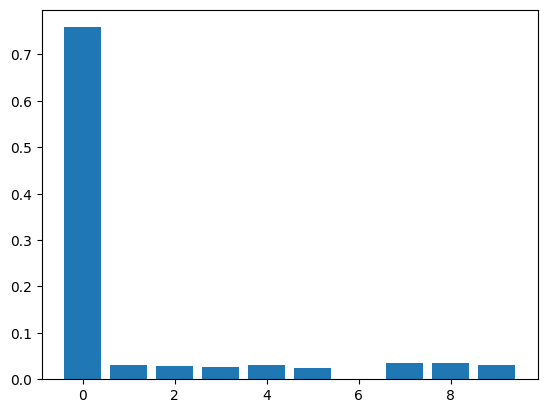

In [ ]:
# get importance
importance2 = regr_3.feature_importances_

# summarize feature importance
for i,v in enumerate(importance2):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance2))], importance2)
pyplot.show()


In [ ]:
importance2[1:]

array([0.02982676, 0.02905893, 0.02720727, 0.02978041, 0.02419196,
       0.0011551 , 0.03498135, 0.03454917, 0.03060665])

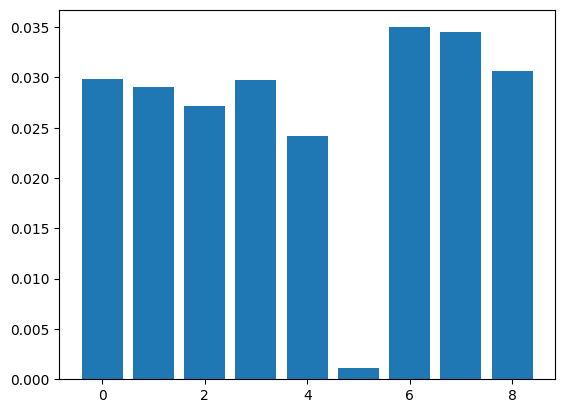

In [ ]:
pyplot.bar([x for x in range(len(importance2[1:]))], importance2[1:])
pyplot.show()

In [ ]:
x_train_subset

,year,speechiness,acousticness,energy,loudness,instrumentalness,explicit,duration_ms,artists_names,danceability
152741,2005,0.0536,0.2950,0.806,-9.849,0.000221,0,188267,4169,0.570
164213,1988,0.0326,0.0194,0.681,-12.577,0.313000,0,299000,2572,0.620
102499,1989,0.0515,0.9750,0.154,-18.150,0.851000,0,111600,16627,0.419
146313,1973,0.0399,0.5950,0.530,-9.550,0.000061,0,180453,5902,0.558
23075,1941,0.4480,0.0623,0.997,-4.262,0.611000,0,56332,8995,0.234
...,...,...,...,...,...,...,...,...,...,...
77849,1947,0.0425,0.9950,0.053,-29.684,0.943000,0,201840,15677,0.483
45605,1962,0.0359,0.4760,0.328,-10.269,0.000000,0,133467,5307,0.576
111854,1955,0.0333,0.7660,0.181,-12.014,0.757000,0,215627,4020,0.262
69954,1994,0.0811,0.1060,0.951,-4.659,0.000010,0,369120,8349,0.759
